In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

media = [
    'NachDenkSeiten', 
    'taz', 
    'DER SPIEGEL', 
    'ARD', 
    'ZDF', 
    'Bayerischer Rundfunk', 
    'ntv Nachrichten', 
    'faz', 
    'WELT', 
    'BILD', 
    'COMPACTTV'
    ]
parties = [
    'linke',
    'grüne',
    'spd',
    'fdp',
    'cdu',
    'csu',
    'afd'
    ]
btw17 = {
    'linke': 69,
    'grüne': 67,
    'spd': 153,
    'fdp': 80,
    'cdu_csu': 246,
    'afd': 94,
}
btw21 = {
    'linke': 39,
    'grüne': 118,
    'spd': 206,
    'fdp': 92,
    'cdu_csu': 197,
    'afd': 83,
}

In [3]:
def a_pivot_df_medium_vs_party(input_df):
    output_df = pd.pivot_table(input_df, index='medium', columns='party', values='title', aggfunc='count', fill_value=0)
    return output_df

def b_sort_df_by_political_ideology(input_df):
    output_df = input_df.reindex(media)[parties]
    return output_df

def c_standardize_df_by_row_sum(input_df):
    output_df = input_df.div(input_df.sum(axis=1), axis=0)
    return output_df

def d_subtract_df_column_means(input_df):
    output_df = input_df - input_df.mean()
    return output_df
    
def e_heatmap_plot_df(input_df):
    f, ax = plt.subplots(figsize=(9, 8))
    f.subplots_adjust(left=0.15, bottom=.13, right=.99, top=.89)
    sns.heatmap(input_df, annot=True, linewidths=.5, ax=ax, fmt=".1%", center=np.nanmean(input_df), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())
    return

def f_saveplot_mentions_short(df, title, path, n_rows_in_title=1):
    from pathlib import Path
    import matplotlib as mpl
    import matplotlib.font_manager as fm
    import matplotlib.pyplot as plt
    mpl.use('pdf')

    fpath = Path(mpl.get_data_path(), "fonts/ttf/cmu_serif_roman.ttf")
    fprop = fm.FontProperties(fname=fpath)

    width = 6.2 #inches
    height = width

    font = {'family':'serif', 'serif': ['cmr10'], 'size':12}
    plt.rc('font',**font)
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)


    f, ax = plt.subplots(figsize=(9, 8))
    if n_rows_in_title==1:
        f.subplots_adjust(left=0.14, bottom=.15, right=.96, top=.93)
    elif n_rows_in_title==2:
        f.subplots_adjust(left=0.14, bottom=.15, right=.99, top=.88)
    else:
        return
    
    df_to_plot = df.copy()
    sns.heatmap(df_to_plot, annot=True, linewidths=.5, ax=ax, fmt=".1%", center=np.nanmean(df_to_plot), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())

    ax.set_xlabel('Party', fontsize=12, font=fpath, color='black')
    ax.set_ylabel('Medium', fontsize=12, font=fpath, color='black')
    ax.set_title(title, fontsize=12, font=fpath, color='black')
    ax.set_xticklabels(['Linke', 'Grüne', 'SPD', 'FDP', 'CDU', 'CSU', 'AfD'], size=12, font=fpath, color='black')
    ax.set_yticklabels(['NDS', 'taz', 'Sp', 'ARD', 'ZDF', 'BR', 'ntv', 'faz', 'WELT', 'BILD', 'CTV'], size=12, font=fpath, color='black')

    f.set_size_inches(width, height*11/21)
    f.savefig(path)
    return

def g_saveplot_mentions_per_seat(df, title, path, n_rows_in_title=1):
    from pathlib import Path
    import matplotlib as mpl
    import matplotlib.font_manager as fm
    import matplotlib.pyplot as plt
    mpl.use('pdf')

    fpath = Path(mpl.get_data_path(), "fonts/ttf/cmu_serif_roman.ttf")
    fprop = fm.FontProperties(fname=fpath)

    width = 6.2 #inches
    height = width

    font = {'family':'serif', 'serif': ['cmr10'], 'size':12}
    plt.rc('font',**font)
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)


    f, ax = plt.subplots(figsize=(9, 8))
    if n_rows_in_title==1:
        f.subplots_adjust(left=0.14, bottom=.15, right=.96, top=.93)
    elif n_rows_in_title==2:
        f.subplots_adjust(left=0.14, bottom=.15, right=.99, top=.88)
    else:
        return
    
    df_to_plot = df.copy()
    sns.heatmap(df_to_plot, annot=True, linewidths=.5, ax=ax, fmt=".2g", center=np.nanmean(df_to_plot), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())

    ax.set_xlabel('Party', fontsize=12, font=fpath, color='black')
    ax.set_ylabel('Medium', fontsize=12, font=fpath, color='black')
    ax.set_title(title, fontsize=12, font=fpath, color='black')
    ax.set_xticklabels(['Linke', 'Grüne', 'SPD', 'FDP', 'CDU/CSU', 'AfD'], size=12, font=fpath, color='black')
    if 'taz' in df_to_plot.index:
        ax.set_yticklabels(['NDS', 'taz', 'Sp', 'ARD', 'ZDF', 'BR', 'ntv', 'faz', 'WELT', 'BILD', 'CTV'], size=12, font=fpath, color='black')
    else:
        ax.set_yticklabels(['NDS', 'Sp', 'ARD', 'ZDF', 'BR', 'ntv', 'faz', 'WELT', 'BILD', 'CTV'], size=12, font=fpath, color='black')
    f.set_size_inches(width, height*11/21)
    f.savefig(path)
    return

In [4]:
unique_politician_df = pd.read_pickle('../data/mentions/politician_mentions_unique.pkl')
unique_politician_df.head()

,search_term,medium,id,title,date,party,mention_count
0,achim post,BILD,r4TFGOhxkvc,LIVE vom SPD-Parteitag! Kommt jetzt das Aus de...,2019-12-06,spd,3
1,achim post,DER SPIEGEL,MgYocKSYPRI,Bundestag debattiert Klima- und Wirtschaftsplä...,2022-01-13,spd,1
2,achim post,DER SPIEGEL,hXiLZPy8RZc,Schlagabtausch im Bundestag zur Politik der Am...,2022-03-23,spd,1
3,achim post,WELT,Lz3H4SB2wS8,MACHTWECHSEL: Bundestag - Wahl von Olaf Scholz...,2021-12-08,spd,1
4,achim post,WELT,X9947FI4Vng,AUFRÜSTUNG UND WAFFENLIEFERUNGEN: Baerbock ste...,2022-04-27,spd,1


In [5]:
unique_politician_mentions_2017_by_party_df = a_pivot_df_medium_vs_party(unique_politician_df[(unique_politician_df.date.dt.year > 2017) & (unique_politician_df.date.dt.year < 2021)])
unique_politician_mentions_2021_by_party_df = a_pivot_df_medium_vs_party(unique_politician_df[unique_politician_df.date.dt.year > 2021])
unique_politician_mentions_by_party_df = a_pivot_df_medium_vs_party(unique_politician_df)
unique_politician_mentions_by_party_df

party,afd,cdu,csu,fdp,grüne,linke,spd
medium,,,,,,,
ARD,13,144,14,67,115,25,182
BILD,35,1810,185,641,684,73,1757
Bayerischer Rundfunk,6,19,22,7,25,4,28
COMPACTTV,53,74,2,22,73,61,97
DER SPIEGEL,41,248,38,116,207,46,272
NachDenkSeiten,11,159,22,21,92,114,255
WELT,76,2176,232,665,1178,202,2348
ZDF,79,1462,129,416,785,161,1531
faz,19,375,63,77,236,31,487


In [6]:
ordered_unique_politician_mentions_2017_by_party_df = b_sort_df_by_political_ideology(unique_politician_mentions_2017_by_party_df)
ordered_unique_politician_mentions_2021_by_party_df = b_sort_df_by_political_ideology(unique_politician_mentions_2021_by_party_df)
ordered_unique_politician_mentions_by_party = b_sort_df_by_political_ideology(unique_politician_mentions_by_party_df)
ordered_unique_politician_mentions_by_party

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,114,92,255,21,159,22,11
taz,35,77,76,23,61,8,6
DER SPIEGEL,46,207,272,116,248,38,41
ARD,25,115,182,67,144,14,13
ZDF,161,785,1531,416,1462,129,79
Bayerischer Rundfunk,4,25,28,7,19,22,6
ntv Nachrichten,41,212,492,138,528,54,40
faz,31,236,487,77,375,63,19
WELT,202,1178,2348,665,2176,232,76


In [7]:
proportion_unique_politician_mentions_2017_by_party_df = c_standardize_df_by_row_sum(ordered_unique_politician_mentions_2017_by_party_df)
proportion_unique_politician_mentions_2021_by_party_df = c_standardize_df_by_row_sum(ordered_unique_politician_mentions_2021_by_party_df)
proportion_unique_politician_mentions_by_party_df = c_standardize_df_by_row_sum(ordered_unique_politician_mentions_by_party)
proportion_unique_politician_mentions_by_party_df

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,0.169139,0.136499,0.378338,0.031157,0.235905,0.032641,0.016320
taz,0.122378,0.269231,0.265734,0.080420,0.213287,0.027972,0.020979
DER SPIEGEL,0.047521,0.213843,0.280992,0.119835,0.256198,0.039256,0.042355
ARD,0.044643,0.205357,0.325000,0.119643,0.257143,0.025000,0.023214
ZDF,0.035284,0.172036,0.335525,0.091168,0.320403,0.028271,0.017313
Bayerischer Rundfunk,0.036036,0.225225,0.252252,0.063063,0.171171,0.198198,0.054054
ntv Nachrichten,0.027243,0.140864,0.326910,0.091694,0.350831,0.035880,0.026578
faz,0.024068,0.183230,0.378106,0.059783,0.291149,0.048913,0.014752
WELT,0.029373,0.171296,0.341428,0.096699,0.316417,0.033736,0.011051


In [8]:
ordered_unique_politician_mentions_2017_by_party_df

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,87,35,166,15,111,16,10
taz,15,30,22,9,18,2,6
DER SPIEGEL,10,66,99,34,107,21,9
ARD,0,3,13,3,20,6,3
ZDF,29,68,267,54,281,42,38
Bayerischer Rundfunk,0,13,12,4,14,7,1
ntv Nachrichten,16,45,164,33,205,18,24
faz,19,70,221,22,162,51,17
WELT,28,58,335,54,490,42,17


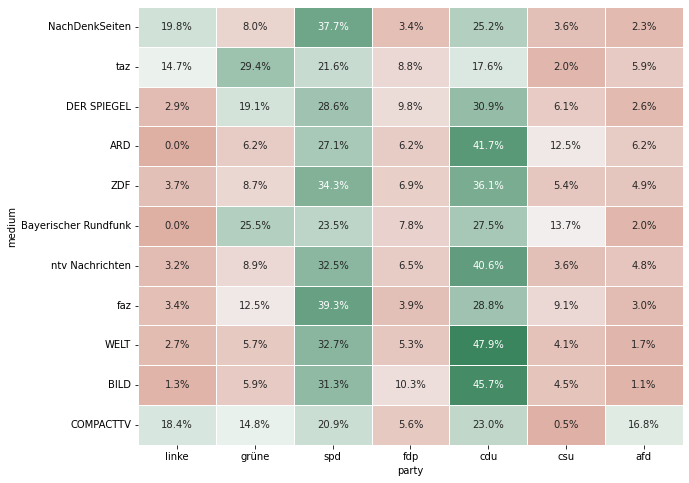

In [9]:
e_heatmap_plot_df(proportion_unique_politician_mentions_2017_by_party_df)

In [10]:
ordered_unique_politician_mentions_2021_by_party_df

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,11,28,24,2,1,0,1
taz,5,12,14,2,6,1,0
DER SPIEGEL,7,49,64,27,37,5,10
ARD,12,58,93,35,47,0,1
ZDF,48,314,472,116,200,39,14
Bayerischer Rundfunk,0,3,1,2,1,0,1
ntv Nachrichten,6,61,99,27,53,9,4
faz,6,97,110,34,43,3,1
WELT,89,714,1005,348,501,102,36


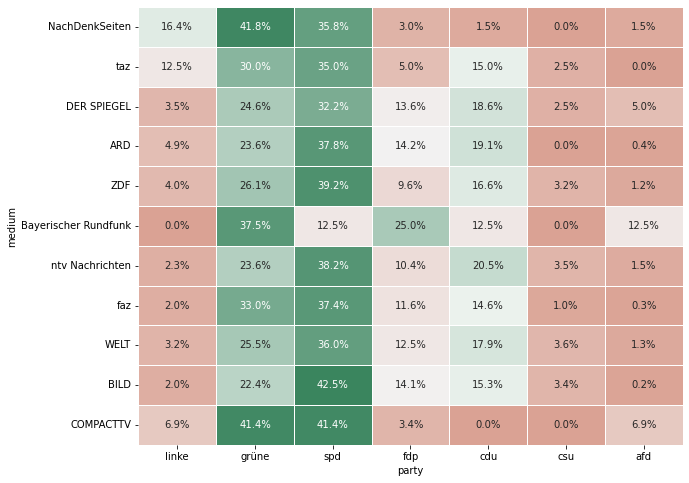

In [11]:
e_heatmap_plot_df(proportion_unique_politician_mentions_2021_by_party_df)

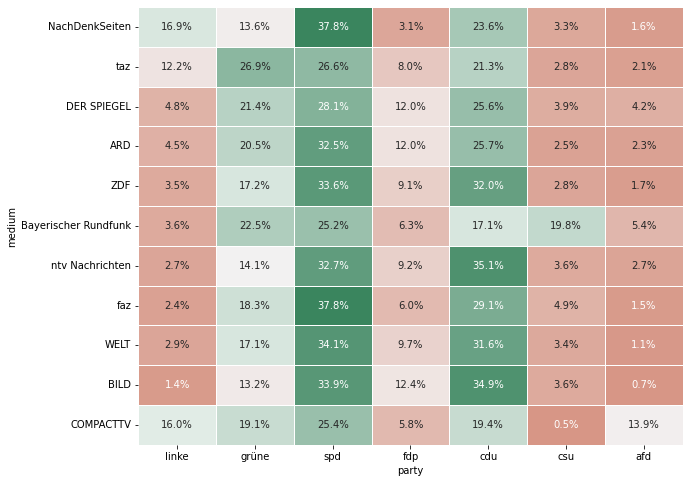

In [12]:
e_heatmap_plot_df(proportion_unique_politician_mentions_by_party_df)

In [13]:
deviations_unique_politician_mentions_2017_by_party_df = d_subtract_df_column_means(proportion_unique_politician_mentions_2017_by_party_df)
deviations_unique_politician_mentions_2021_by_party_df = d_subtract_df_column_means(proportion_unique_politician_mentions_2021_by_party_df)
deviations_unique_politician_mentions_by_party_df = d_subtract_df_column_means(proportion_unique_politician_mentions_by_party_df)
deviations_unique_politician_mentions_by_party_df

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,0.104644,-0.049010,0.062241,-0.053814,-0.032759,-0.013794,-0.017508
taz,0.057882,0.083722,-0.050363,-0.004551,-0.055377,-0.018463,-0.012849
DER SPIEGEL,-0.016975,0.028334,-0.035106,0.034864,-0.012466,-0.007179,0.008527
ARD,-0.019853,0.019848,0.008902,0.034672,-0.011521,-0.021435,-0.010614
ZDF,-0.029212,-0.013473,0.019427,0.006197,0.051739,-0.018164,-0.016515
Bayerischer Rundfunk,-0.028459,0.039716,-0.063845,-0.021908,-0.097493,0.151763,0.020226
ntv Nachrichten,-0.037253,-0.044645,0.010813,0.006724,0.082166,-0.010554,-0.007250
faz,-0.040427,-0.002279,0.062008,-0.025188,0.022485,0.002478,-0.019077
WELT,-0.035122,-0.014213,0.025330,0.011728,0.047753,-0.012699,-0.022777


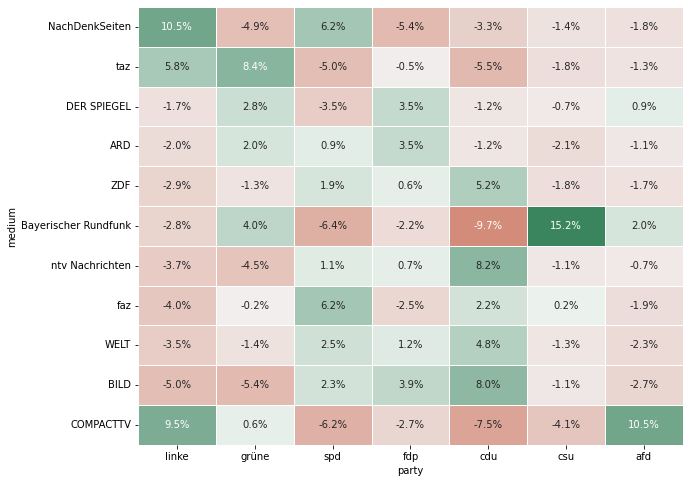

In [14]:
e_heatmap_plot_df(deviations_unique_politician_mentions_by_party_df)

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_88669/2222034850.py:44: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()
/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_88669/2222034850.py:44: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


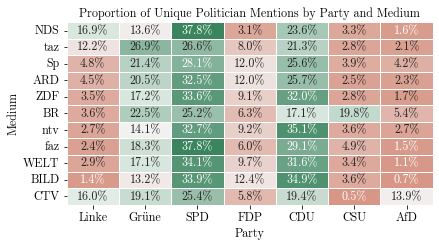

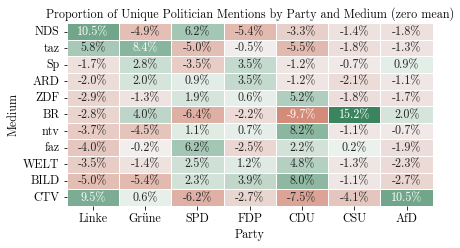

In [15]:
f_saveplot_mentions_short(df=proportion_unique_politician_mentions_by_party_df, title='Proportion of Unique Politician Mentions by Party and Medium', path='../results/englisch/erwähnungen_politiker_gekuerzt_einzigartig.pdf')
f_saveplot_mentions_short(df=deviations_unique_politician_mentions_by_party_df, title='Proportion of Unique Politician Mentions by Party and Medium (zero mean)', path='../results/englisch/erwähnungen_politiker_gekuerzt_mittelwertfrei_einzigartig.pdf', n_rows_in_title=1)

In [16]:
unique_politician_mentions_2017 = ordered_unique_politician_mentions_2017_by_party_df.copy()

unique_politician_mentions_2017['cdu_csu'] = unique_politician_mentions_2017['cdu'] + unique_politician_mentions_2017['csu']
unique_politician_mentions_2017.drop(columns=['cdu', 'csu'], inplace=True)
unique_politician_mentions_2017 = unique_politician_mentions_2017[['linke', 'grüne', 'spd', 'fdp', 'cdu_csu', 'afd']]

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_88669/920510329.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'unique politician mentions pro sitz im bundestag 2017, standardisiert auf afd')

/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


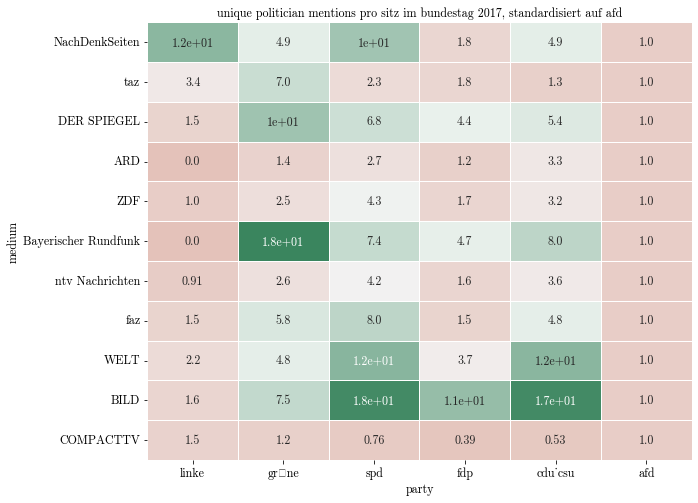

In [17]:
unique_politician_mentions_17 = unique_politician_mentions_2017.copy()
for party in btw17.keys():
    unique_politician_mentions_17[party] /= btw17[party]

unique_politician_mentions_17_standardized = unique_politician_mentions_17.div(unique_politician_mentions_17['afd'], axis=0)

f, ax = plt.subplots(figsize=(9, 8))
f.subplots_adjust(left=0.15, bottom=.13, right=.99, top=.89)
sns.heatmap(unique_politician_mentions_17_standardized, annot=True, linewidths=.5, ax=ax, fmt="1.2", center=np.nanmean(unique_politician_mentions_17_standardized), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())
plt.title('unique politician mentions pro sitz im bundestag 2017, standardisiert auf afd')

In [18]:
unique_politician_mentions_2021 = ordered_unique_politician_mentions_2021_by_party_df.copy()

unique_politician_mentions_2021['cdu_csu'] = unique_politician_mentions_2021['cdu'] + unique_politician_mentions_2021['csu']
unique_politician_mentions_2021.drop(columns=['cdu', 'csu'], inplace=True)
unique_politician_mentions_2021 = unique_politician_mentions_2021[['linke', 'grüne', 'spd', 'fdp', 'cdu_csu', 'afd']]

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_88669/3714770422.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'unique politician mentions pro sitz im bundestag 2021, standardisiert auf afd\ntaz entfernt weil keine afd politician mentions vorhanden waren')

/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


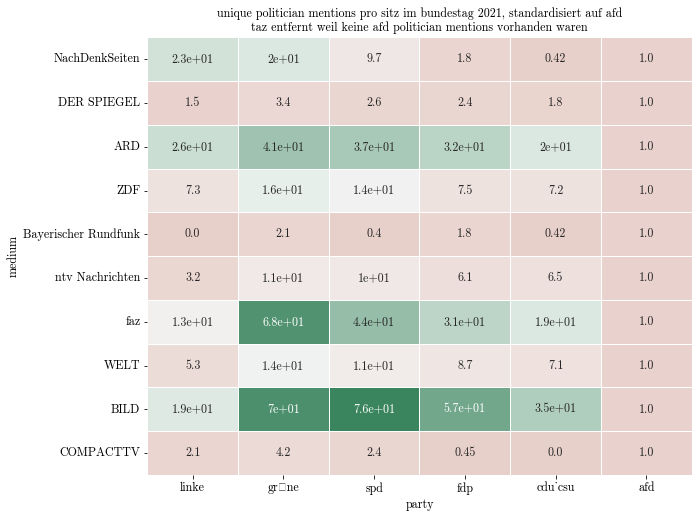

In [19]:
unique_politician_mentions_21 = unique_politician_mentions_2021.copy()
for party in btw21.keys():
    unique_politician_mentions_21[party] /= btw21[party]

unique_politician_mentions_21_standardized = unique_politician_mentions_21.div(unique_politician_mentions_21['afd'], axis=0).replace([np.inf, -np.inf], np.nan).dropna()

f, ax = plt.subplots(figsize=(9, 8))
f.subplots_adjust(left=0.15, bottom=.13, right=.99, top=.89)
sns.heatmap(unique_politician_mentions_21_standardized, annot=True, linewidths=.5, ax=ax, fmt="1.2", center=np.nanmean(unique_politician_mentions_21_standardized), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())
plt.title('unique politician mentions pro sitz im bundestag 2021, standardisiert auf afd\ntaz entfernt weil keine afd politician mentions vorhanden waren')

/Users/hs/miniforge3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:387: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  axes = fig.add_subplot(111)


Text(0.5, 1.0, 'durchschnitt aller medien (ausgenommen extreme), unique politician mentions pro sitz im bundestag, standardisiert auf afd\nblau 2017, orange 2021')

/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


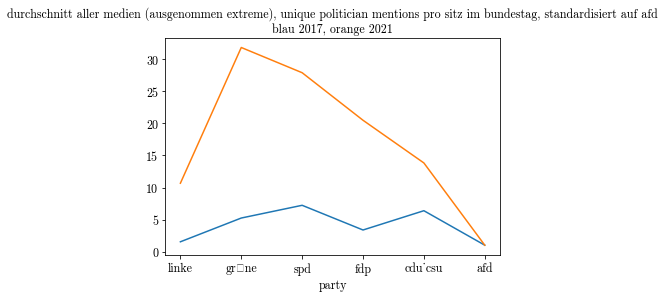

In [20]:
unique_politician_mentions_17_standardized.drop(['NachDenkSeiten', 'Bayerischer Rundfunk', 'COMPACTTV']).mean().plot()
unique_politician_mentions_21_standardized.drop(['NachDenkSeiten', 'Bayerischer Rundfunk', 'COMPACTTV']).mean().plot()
plt.title('durchschnitt aller medien (ausgenommen extreme), unique politician mentions pro sitz im bundestag, standardisiert auf afd\nblau 2017, orange 2021')

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_88669/2222034850.py:86: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()
/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_88669/2222034850.py:86: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


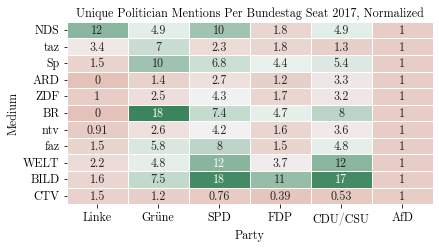

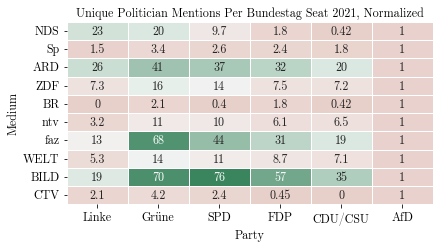

In [21]:
g_saveplot_mentions_per_seat(df=unique_politician_mentions_17_standardized, title='Unique Politician Mentions Per Bundestag Seat 2017, Normalized', path='../results/englisch/erwähnungen_politiker_gekuerzt_einzigartig_pro_sitz_2017.pdf')
g_saveplot_mentions_per_seat(df=unique_politician_mentions_21_standardized, title='Unique Politician Mentions Per Bundestag Seat 2021, Normalized', path='../results/englisch/erwähnungen_politiker_gekuerzt_einzigartig_pro_sitz_2021.pdf')

In [22]:
unique_lineplot_df = pd.DataFrame()
unique_lineplot_df['2017'] = unique_politician_mentions_17_standardized.drop(['NachDenkSeiten', 'Bayerischer Rundfunk', 'COMPACTTV']).mean()
unique_lineplot_df['2021'] = unique_politician_mentions_21_standardized.drop(['NachDenkSeiten', 'Bayerischer Rundfunk', 'COMPACTTV']).mean()
unique_lineplot_df = unique_lineplot_df.T
unique_lineplot_df['year'] = unique_lineplot_df.index
unique_lineplot_df = pd.melt(unique_lineplot_df, id_vars=['year'], value_vars=['linke', 'grüne', 'spd', 'fdp', 'cdu_csu', 'afd'])
unique_lineplot_df.columns = ['Year', 'party', 'value']
unique_lineplot_df.to_pickle('../data/mentions/lineplot_unique_politicians.pkl')